In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import ModelCheckpoint,Callback
from tensorflow.keras import Model
from tensorflow.keras import optimizers
import numpy as np
import keras
from skimage import io
from keras.utils import np_utils
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


# Data_Preprocessing

In [5]:
data_dir = 'final_dataset/'
lis_dir = []
def dataset_split(dataset):
    lis_dir = os.listdir(data_dir)
    if(dataset == 'celeb_df'):
        return(data_dir+lis_dir[0]+'/')
    elif(dataset == 'ddff'):
        return(data_dir+lis_dir[1]+'/')
    elif(dataset == 'ff++'):
        return(data_dir+lis_dir[2]+'/')
    else:
        return print("Wrong Dataset Name")
    

In [6]:
batch_size = 32
img_height = 224
img_width = 224
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=False,vertical_flip=False, validation_split=0.2)

def train_dp(data_dir):
    train_gen = datagen.flow_from_directory(directory=data_dir, target_size=(224,224), 
                                            class_mode='binary',batch_size=32,subset='training')
    return train_gen

def val_dp(data_dir):
    val_gen = datagen.flow_from_directory(directory=data_dir, target_size=(224,224), 
                                          class_mode='binary',batch_size=32,subset='validation')
    return val_gen
    
    

# Building VGG16 Model

In [7]:
vgg = VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
fine_tune_at = 5

# Freeze all the layers before the `fine_tune_at` layer
for layer in vgg.layers[:fine_tune_at]:
    layer.trainable =  False

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/ta

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/repli

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [8]:
def my_model(in_shape=(224,224,3)):
    model = Sequential()
    model.add(vgg)
    model.add(Conv2D(64,(3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.6))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    return model

#call define model
vgg_model = my_model()
vgg_model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:local

In [9]:
sgd = optimizers.SGD(learning_rate=0.0001, momentum=0.5, decay = 0.0001)

In [10]:
vgg_model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [12]:
dot_img_file = 'vgg_model_.png'
tf.keras.utils.plot_model(vgg_model, to_file=dot_img_file, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# TRAINING WITH CELEB_DF DATASET

In [21]:
train_ds = train_dp(dataset_split('celeb_df'))
val_ds = val_dp(dataset_split('celeb_df'))

Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Found 18006 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


In [23]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

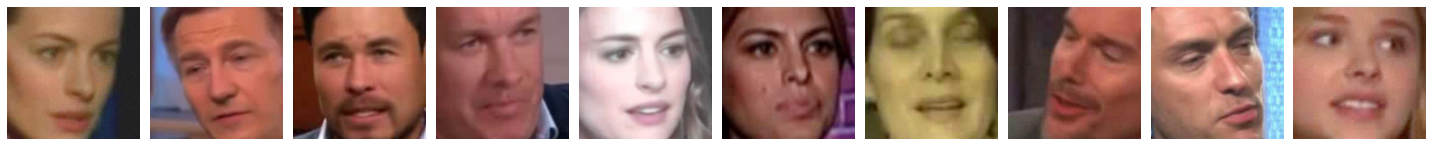

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 1.]


In [24]:
imgs, labels = next(train_ds)
plotImages(imgs)
print(labels)

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("VGG_s_models/VGG16_1.h5", monitor='val_accuracy', 
                             verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', save_freq=1)
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
history = vgg_model.fit(x=train_ds, steps_per_epoch=len(train_ds),validation_data=val_ds,
                               validation_steps=len(val_ds), epochs=20,callbacks=[checkpoint, earlystop])

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assign

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 22/563 [>.............................] - ETA: 2:17 - loss: 0.7736 - accuracy: 0.4744WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 23/563 [>.............................] - ETA: 2:17 - loss: 0.7690 - accuracy: 0.4783WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 24/563 [>.............................] - ETA: 2:16 - loss: 0.7707 - accuracy: 0.4727WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 25/563 [>.............................] - ETA: 2:16 - loss: 0.7667 - accuracy: 0.4775WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 83/563 [===>..........................] - ETA: 2:03 - loss: 0.7402 - accuracy: 0.4910WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/563 [===>..........................] - ETA: 2:03 - loss: 0.7402 - accuracy: 0.4911WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 85/563 [===>..........................] - ETA: 2:02 - loss: 0.7402 - accuracy: 0.4904WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 86/563 [===>..........................] - ETA: 2:02 - loss: 0.7396 - accuracy: 0.4924WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
144/563 [======>.......................] - ETA: 1:49 - loss: 0.7258 - accuracy: 0.5095WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
145/563 [======>.......................] - ETA: 1:49 - loss: 0.7260 - accuracy: 0.5093WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
146/563 [======>.......................] - ETA: 1:49 - loss: 0.7258 - accuracy: 0.5098WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
147/563 [======>.......................] - ETA: 1:48 - loss: 0.7257 - accuracy: 0.5098WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
205/563 [=========>....................] - ETA: 1:45 - loss: 0.7218 - accuracy: 0.5156WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
206/563 [=========>....................] - ETA: 1:45 - loss: 0.7217 - accuracy: 0.5160WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
207/563 [==========>...................] - ETA: 1:44 - loss: 0.7214 - accuracy: 0.5165WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
208/563 [==========>...................] - ETA: 1:44 - loss: 0.7209 - accuracy: 0.5176WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
266/563 [=============>................] - ETA: 1:25 - loss: 0.7170 - accuracy: 0.5218WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
267/563 [=============>................] - ETA: 1:24 - loss: 0.7169 - accuracy: 0.5223WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
268/563 [=============>................] - ETA: 1:24 - loss: 0.7168 - accuracy: 0.5228WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
269/563 [=============>................] - ETA: 1:24 - loss: 0.7168 - accuracy: 0.5228WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
327/563 [================>.............] - ETA: 1:06 - loss: 0.7129 - accuracy: 0.5257WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
328/563 [================>.............] - ETA: 1:06 - loss: 0.7128 - accuracy: 0.5258WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
329/563 [================>.............] - ETA: 1:06 - loss: 0.7126 - accuracy: 0.5261WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
330/563 [================>.............] - ETA: 1:05 - loss: 0.7123 - accuracy: 0.5264WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
388/563 [===================>..........] - ETA: 48s - loss: 0.7073 - accuracy: 0.5314WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
389/563 [===================>..........] - ETA: 48s - loss: 0.7074 - accuracy: 0.5311WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
390/563 [===================>..........] - ETA: 48s - loss: 0.7073 - accuracy: 0.5314WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
391/563 [===================>..........] - ETA: 47s - loss: 0.7072 - accuracy: 0.5314WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
449/563 [======================>.......] - ETA: 31s - loss: 0.7038 - accuracy: 0.5369WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
450/563 [======================>.......] - ETA: 31s - loss: 0.7037 - accuracy: 0.5370WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
451/563 [=======================>......] - ETA: 30s - loss: 0.7038 - accuracy: 0.5370WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
452/563 [=======================>......] - ETA: 30s - loss: 0.7038 - accuracy: 0.5369WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
510/563 [==========================>...] - ETA: 14s - loss: 0.6996 - accuracy: 0.5424WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
511/563 [==========================>...] - ETA: 14s - loss: 0.6995 - accuracy: 0.5428WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
512/563 [==========================>...] - ETA: 13s - loss: 0.6994 - accuracy: 0.5431WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
513/563 [==========================>...] - ETA: 13s - loss: 0.6994 - accuracy: 0.5432WARNING:ten

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/563 [..............................] - ETA: 2:22 - loss: 0.6500 - accuracy: 0.6198WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/563 [..............................] - ETA: 2:21 - loss: 0.6424 - accuracy: 0.6295WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/563 [..............................] - ETA: 2:21 - loss: 0.6354 - accuracy: 0.6484WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/563 [..............................] - ETA: 2:21 - loss: 0.6352 - accuracy: 0.6528WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 67/563 [==>...........................] - ETA: 2:06 - loss: 0.6352 - accuracy: 0.6483WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/563 [==>...........................] - ETA: 2:06 - loss: 0.6347 - accuracy: 0.6480WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/563 [==>...........................] - ETA: 2:06 - loss: 0.6343 - accuracy: 0.6490WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 70/563 [==>...........................] - ETA: 2:05 - loss: 0.6347 - accuracy: 0.6498WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
128/563 [=====>........................] - ETA: 1:50 - loss: 0.6310 - accuracy: 0.6517WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
129/563 [=====>........................] - ETA: 1:50 - loss: 0.6315 - accuracy: 0.6513WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
130/563 [=====>........................] - ETA: 1:50 - loss: 0.6314 - accuracy: 0.6508WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
131/563 [=====>........................] - ETA: 1:50 - loss: 0.6310 - accuracy: 0.6511WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
189/563 [=========>....................] - ETA: 1:35 - loss: 0.6272 - accuracy: 0.6573WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
190/563 [=========>....................] - ETA: 1:35 - loss: 0.6271 - accuracy: 0.6573WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
191/563 [=========>....................] - ETA: 1:34 - loss: 0.6271 - accuracy: 0.6573WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
192/563 [=========>....................] - ETA: 1:34 - loss: 0.6269 - accuracy: 0.6578WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
250/563 [============>.................] - ETA: 1:19 - loss: 0.6208 - accuracy: 0.6655WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
251/563 [============>.................] - ETA: 1:19 - loss: 0.6207 - accuracy: 0.6655WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
252/563 [============>.................] - ETA: 1:19 - loss: 0.6204 - accuracy: 0.6658WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
253/563 [============>.................] - ETA: 1:18 - loss: 0.6204 - accuracy: 0.6657WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
311/563 [===============>..............] - ETA: 1:04 - loss: 0.6139 - accuracy: 0.6752WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
312/563 [===============>..............] - ETA: 1:03 - loss: 0.6137 - accuracy: 0.6754WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
313/563 [===============>..............] - ETA: 1:03 - loss: 0.6134 - accuracy: 0.6756WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
314/563 [===============>..............] - ETA: 1:03 - loss: 0.6133 - accuracy: 0.6758WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
372/563 [==================>...........] - ETA: 48s - loss: 0.6081 - accuracy: 0.6824WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
373/563 [==================>...........] - ETA: 48s - loss: 0.6078 - accuracy: 0.6826WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
374/563 [==================>...........] - ETA: 48s - loss: 0.6077 - accuracy: 0.6825WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
375/563 [==================>...........] - ETA: 47s - loss: 0.6078 - accuracy: 0.6822WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
433/563 [======================>.......] - ETA: 33s - loss: 0.6048 - accuracy: 0.6857WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
434/563 [======================>.......] - ETA: 32s - loss: 0.6046 - accuracy: 0.6859WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
435/563 [======================>.......] - ETA: 32s - loss: 0.6045 - accuracy: 0.6859WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
436/563 [======================>.......] - ETA: 32s - loss: 0.6045 - accuracy: 0.6861WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
494/563 [=========================>....] - ETA: 17s - loss: 0.6006 - accuracy: 0.6900WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
495/563 [=========================>....] - ETA: 17s - loss: 0.6004 - accuracy: 0.6903WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
496/563 [=========================>....] - ETA: 17s - loss: 0.6006 - accuracy: 0.6903WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
497/563 [=========================>....] - ETA: 16s - loss: 0.6004 - accuracy: 0.6904WARNING:ten

555/563 [============================>.] - ETA: 2s - loss: 0.5955 - accuracy: 0.6951WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
556/563 [============================>.] - ETA: 1s - loss: 0.5954 - accuracy: 0.6951WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
557/563 [============================>.] - ETA: 1s - loss: 0.5951 - accuracy: 0.6953WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
558/563 [============================>.] - ETA: 1s - loss: 0.5949 - accuracy: 0.6954WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_f

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 54/563 [=>............................] - ETA: 2:10 - loss: 0.5749 - accuracy: 0.7205WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 55/563 [=>............................] - ETA: 2:09 - loss: 0.5737 - accuracy: 0.7216WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/563 [=>............................] - ETA: 2:09 - loss: 0.5729 - accuracy: 0.7227WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/563 [==>...........................] - ETA: 2:09 - loss: 0.5741 - accuracy: 0.7209WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
115/563 [=====>........................] - ETA: 1:54 - loss: 0.5643 - accuracy: 0.7293WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
116/563 [=====>........................] - ETA: 1:54 - loss: 0.5645 - accuracy: 0.7293WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
117/563 [=====>........................] - ETA: 1:53 - loss: 0.5651 - accuracy: 0.7284WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
118/563 [=====>........................] - ETA: 1:53 - loss: 0.5646 - accuracy: 0.7291WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
176/563 [========>.....................] - ETA: 1:38 - loss: 0.5609 - accuracy: 0.7330WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
177/563 [========>.....................] - ETA: 1:38 - loss: 0.5602 - accuracy: 0.7336WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
178/563 [========>.....................] - ETA: 1:38 - loss: 0.5601 - accuracy: 0.7333WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
179/563 [========>.....................] - ETA: 1:38 - loss: 0.5612 - accuracy: 0.7318WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
237/563 [===========>..................] - ETA: 1:23 - loss: 0.5568 - accuracy: 0.7338WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
238/563 [===========>..................] - ETA: 1:22 - loss: 0.5563 - accuracy: 0.7341WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
239/563 [===========>..................] - ETA: 1:22 - loss: 0.5563 - accuracy: 0.7340WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
240/563 [===========>..................] - ETA: 1:22 - loss: 0.5558 - accuracy: 0.7344WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
298/563 [==============>...............] - ETA: 1:07 - loss: 0.5493 - accuracy: 0.7410WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
299/563 [==============>...............] - ETA: 1:07 - loss: 0.5493 - accuracy: 0.7408WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
300/563 [==============>...............] - ETA: 1:07 - loss: 0.5501 - accuracy: 0.7400WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
301/563 [===============>..............] - ETA: 1:06 - loss: 0.5500 - accuracy: 0.7402WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
359/563 [==================>...........] - ETA: 52s - loss: 0.5488 - accuracy: 0.7424WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
360/563 [==================>...........] - ETA: 51s - loss: 0.5486 - accuracy: 0.7427WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
361/563 [==================>...........] - ETA: 51s - loss: 0.5486 - accuracy: 0.7427WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
362/563 [==================>...........] - ETA: 51s - loss: 0.5487 - accuracy: 0.7424WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
420/563 [=====================>........] - ETA: 36s - loss: 0.5453 - accuracy: 0.7436WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
421/563 [=====================>........] - ETA: 36s - loss: 0.5452 - accuracy: 0.7437WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
422/563 [=====================>........] - ETA: 35s - loss: 0.5453 - accuracy: 0.7436WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
423/563 [=====================>........] - ETA: 35s - loss: 0.5452 - accuracy: 0.7436WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
481/563 [========================>.....] - ETA: 20s - loss: 0.5447 - accuracy: 0.7422WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
482/563 [========================>.....] - ETA: 20s - loss: 0.5445 - accuracy: 0.7424WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
483/563 [========================>.....] - ETA: 20s - loss: 0.5446 - accuracy: 0.7423WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
484/563 [========================>.....] - ETA: 20s - loss: 0.5443 - accuracy: 0.7424WARNING:ten

542/563 [===========================>..] - ETA: 5s - loss: 0.5406 - accuracy: 0.7437WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
543/563 [===========================>..] - ETA: 5s - loss: 0.5404 - accuracy: 0.7439WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
544/563 [===========================>..] - ETA: 4s - loss: 0.5406 - accuracy: 0.7438WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
545/563 [============================>.] - ETA: 4s - loss: 0.5405 - accuracy: 0.7439WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_f

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/563 [=>............................] - ETA: 2:13 - loss: 0.5017 - accuracy: 0.7614WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/563 [=>............................] - ETA: 2:13 - loss: 0.5016 - accuracy: 0.7604WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/563 [=>............................] - ETA: 2:12 - loss: 0.5030 - accuracy: 0.7594WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/563 [=>............................] - ETA: 2:12 - loss: 0.5008 - accuracy: 0.7621WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
102/563 [====>.........................] - ETA: 1:57 - loss: 0.5161 - accuracy: 0.7577WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
103/563 [====>.........................] - ETA: 1:57 - loss: 0.5181 - accuracy: 0.7567WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
104/563 [====>.........................] - ETA: 1:57 - loss: 0.5184 - accuracy: 0.7563WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
105/563 [====>.........................] - ETA: 1:56 - loss: 0.5183 - accuracy: 0.7563WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
163/563 [=======>......................] - ETA: 1:42 - loss: 0.5245 - accuracy: 0.7517WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
164/563 [=======>......................] - ETA: 1:41 - loss: 0.5240 - accuracy: 0.7525WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
165/563 [=======>......................] - ETA: 1:41 - loss: 0.5241 - accuracy: 0.7525WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
166/563 [=======>......................] - ETA: 1:41 - loss: 0.5229 - accuracy: 0.7532WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
224/563 [==========>...................] - ETA: 1:26 - loss: 0.5176 - accuracy: 0.7553WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
225/563 [==========>...................] - ETA: 1:26 - loss: 0.5172 - accuracy: 0.7557WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
226/563 [===========>..................] - ETA: 1:25 - loss: 0.5165 - accuracy: 0.7564WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
227/563 [===========>..................] - ETA: 1:25 - loss: 0.5165 - accuracy: 0.7563WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
285/563 [==============>...............] - ETA: 1:10 - loss: 0.5151 - accuracy: 0.7586WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
286/563 [==============>...............] - ETA: 1:10 - loss: 0.5150 - accuracy: 0.7586WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
287/563 [==============>...............] - ETA: 1:10 - loss: 0.5154 - accuracy: 0.7583WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
288/563 [==============>...............] - ETA: 1:10 - loss: 0.5154 - accuracy: 0.7582WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
346/563 [=================>............] - ETA: 55s - loss: 0.5134 - accuracy: 0.7593WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
347/563 [=================>............] - ETA: 55s - loss: 0.5134 - accuracy: 0.7591WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
348/563 [=================>............] - ETA: 54s - loss: 0.5135 - accuracy: 0.7589WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
349/563 [=================>............] - ETA: 54s - loss: 0.5133 - accuracy: 0.7592WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
407/563 [====================>.........] - ETA: 39s - loss: 0.5135 - accuracy: 0.7580WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
408/563 [====================>.........] - ETA: 39s - loss: 0.5135 - accuracy: 0.7579WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
409/563 [====================>.........] - ETA: 39s - loss: 0.5135 - accuracy: 0.7580WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
410/563 [====================>.........] - ETA: 39s - loss: 0.5135 - accuracy: 0.7577WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
468/563 [=======================>......] - ETA: 24s - loss: 0.5108 - accuracy: 0.7588WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
469/563 [=======================>......] - ETA: 23s - loss: 0.5106 - accuracy: 0.7589WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
470/563 [========================>.....] - ETA: 23s - loss: 0.5103 - accuracy: 0.7591WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
471/563 [========================>.....] - ETA: 23s - loss: 0.5099 - accuracy: 0.7593WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
529/563 [===========================>..] - ETA: 8s - loss: 0.5073 - accuracy: 0.7602WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
530/563 [===========================>..] - ETA: 8s - loss: 0.5070 - accuracy: 0.7603WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
531/563 [===========================>..] - ETA: 8s - loss: 0.5073 - accuracy: 0.7600WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
532/563 [===========================>..] - ETA: 7s - loss: 0.5074 - accuracy: 0.7600WARNING:tensorf

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

563/563 [==============================] - 159s 282ms/step - loss: 0.5075 - accuracy: 0.7600 - val_loss: 0.7076 - val_accuracy: 0.5649
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in devic

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/563 [==>...........................] - ETA: 2:08 - loss: 0.5029 - accuracy: 0.7551WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/563 [==>...........................] - ETA: 2:08 - loss: 0.5020 - accuracy: 0.7561WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/563 [==>...........................] - ETA: 2:08 - loss: 0.5016 - accuracy: 0.7560WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/563 [==>...........................] - ETA: 2:08 - loss: 0.5007 - accuracy: 0.7564WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
119/563 [=====>........................] - ETA: 1:53 - loss: 0.4944 - accuracy: 0.7612WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
120/563 [=====>........................] - ETA: 1:53 - loss: 0.4930 - accuracy: 0.7621WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
121/563 [=====>........................] - ETA: 1:52 - loss: 0.4924 - accuracy: 0.7623WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
122/563 [=====>........................] - ETA: 1:52 - loss: 0.4941 - accuracy: 0.7612WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
180/563 [========>.....................] - ETA: 1:37 - loss: 0.4933 - accuracy: 0.7654WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
181/563 [========>.....................] - ETA: 1:37 - loss: 0.4929 - accuracy: 0.7658WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
182/563 [========>.....................] - ETA: 1:37 - loss: 0.4935 - accuracy: 0.7654WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
183/563 [========>.....................] - ETA: 1:37 - loss: 0.4939 - accuracy: 0.7657WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
241/563 [===========>..................] - ETA: 1:22 - loss: 0.4904 - accuracy: 0.7650WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
242/563 [===========>..................] - ETA: 1:22 - loss: 0.4903 - accuracy: 0.7652WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
243/563 [===========>..................] - ETA: 1:21 - loss: 0.4903 - accuracy: 0.7651WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
244/563 [============>.................] - ETA: 1:21 - loss: 0.4904 - accuracy: 0.7649WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
302/563 [===============>..............] - ETA: 1:06 - loss: 0.4848 - accuracy: 0.7700WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
303/563 [===============>..............] - ETA: 1:06 - loss: 0.4848 - accuracy: 0.7701WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
304/563 [===============>..............] - ETA: 1:06 - loss: 0.4845 - accuracy: 0.7702WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
305/563 [===============>..............] - ETA: 1:05 - loss: 0.4841 - accuracy: 0.7705WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
363/563 [==================>...........] - ETA: 51s - loss: 0.4828 - accuracy: 0.7720WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
364/563 [==================>...........] - ETA: 50s - loss: 0.4831 - accuracy: 0.7717WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
365/563 [==================>...........] - ETA: 50s - loss: 0.4832 - accuracy: 0.7715WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
366/563 [==================>...........] - ETA: 50s - loss: 0.4832 - accuracy: 0.7716WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
424/563 [=====================>........] - ETA: 35s - loss: 0.4832 - accuracy: 0.7697WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
425/563 [=====================>........] - ETA: 35s - loss: 0.4834 - accuracy: 0.7695WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
426/563 [=====================>........] - ETA: 35s - loss: 0.4834 - accuracy: 0.7694WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
427/563 [=====================>........] - ETA: 34s - loss: 0.4834 - accuracy: 0.7694WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
485/563 [========================>.....] - ETA: 19s - loss: 0.4816 - accuracy: 0.7712WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
486/563 [========================>.....] - ETA: 19s - loss: 0.4815 - accuracy: 0.7714WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
487/563 [========================>.....] - ETA: 19s - loss: 0.4816 - accuracy: 0.7712WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
488/563 [=========================>....] - ETA: 19s - loss: 0.4816 - accuracy: 0.7711WARNING:ten

546/563 [============================>.] - ETA: 4s - loss: 0.4813 - accuracy: 0.7706WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
547/563 [============================>.] - ETA: 4s - loss: 0.4813 - accuracy: 0.7706WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
548/563 [============================>.] - ETA: 3s - loss: 0.4811 - accuracy: 0.7707WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
549/563 [============================>.] - ETA: 3s - loss: 0.4814 - accuracy: 0.7705WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_f

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/563 [..............................] - ETA: 2:21 - loss: 0.4393 - accuracy: 0.7917WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/563 [..............................] - ETA: 2:20 - loss: 0.4374 - accuracy: 0.7910WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/563 [..............................] - ETA: 2:20 - loss: 0.4339 - accuracy: 0.7960WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/563 [..............................] - ETA: 2:20 - loss: 0.4443 - accuracy: 0.7882WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 76/563 [===>..........................] - ETA: 2:05 - loss: 0.4839 - accuracy: 0.7689WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 77/563 [===>..........................] - ETA: 2:05 - loss: 0.4849 - accuracy: 0.7679WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 78/563 [===>..........................] - ETA: 2:04 - loss: 0.4837 - accuracy: 0.7684WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 79/563 [===>..........................] - ETA: 2:04 - loss: 0.4833 - accuracy: 0.7686WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
137/563 [======>.......................] - ETA: 1:49 - loss: 0.4664 - accuracy: 0.7778WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
138/563 [======>.......................] - ETA: 1:49 - loss: 0.4668 - accuracy: 0.7776WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
139/563 [======>.......................] - ETA: 1:49 - loss: 0.4663 - accuracy: 0.7786WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
140/563 [======>.......................] - ETA: 1:48 - loss: 0.4662 - accuracy: 0.7781WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
198/563 [=========>....................] - ETA: 1:33 - loss: 0.4691 - accuracy: 0.7776WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
199/563 [=========>....................] - ETA: 1:33 - loss: 0.4698 - accuracy: 0.7769WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
200/563 [=========>....................] - ETA: 1:33 - loss: 0.4703 - accuracy: 0.7763WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
201/563 [=========>....................] - ETA: 1:33 - loss: 0.4706 - accuracy: 0.7760WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
259/563 [============>.................] - ETA: 1:18 - loss: 0.4718 - accuracy: 0.7745WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
260/563 [============>.................] - ETA: 1:17 - loss: 0.4721 - accuracy: 0.7740WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
261/563 [============>.................] - ETA: 1:17 - loss: 0.4724 - accuracy: 0.7738WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
262/563 [============>.................] - ETA: 1:17 - loss: 0.4725 - accuracy: 0.7737WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
320/563 [================>.............] - ETA: 1:02 - loss: 0.4717 - accuracy: 0.7753WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
321/563 [================>.............] - ETA: 1:02 - loss: 0.4714 - accuracy: 0.7756WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
322/563 [================>.............] - ETA: 1:01 - loss: 0.4712 - accuracy: 0.7756WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
323/563 [================>.............] - ETA: 1:01 - loss: 0.4714 - accuracy: 0.7755WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
381/563 [===================>..........] - ETA: 46s - loss: 0.4666 - accuracy: 0.7789WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
382/563 [===================>..........] - ETA: 46s - loss: 0.4664 - accuracy: 0.7789WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
383/563 [===================>..........] - ETA: 46s - loss: 0.4664 - accuracy: 0.7789WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
384/563 [===================>..........] - ETA: 46s - loss: 0.4669 - accuracy: 0.7785WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
442/563 [======================>.......] - ETA: 31s - loss: 0.4649 - accuracy: 0.7793WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
443/563 [======================>.......] - ETA: 30s - loss: 0.4649 - accuracy: 0.7793WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
444/563 [======================>.......] - ETA: 30s - loss: 0.4649 - accuracy: 0.7795WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
445/563 [======================>.......] - ETA: 30s - loss: 0.4649 - accuracy: 0.7793WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
503/563 [=========================>....] - ETA: 15s - loss: 0.4649 - accuracy: 0.7789WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
504/563 [=========================>....] - ETA: 15s - loss: 0.4648 - accuracy: 0.7791WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
505/563 [=========================>....] - ETA: 14s - loss: 0.4646 - accuracy: 0.7791WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
506/563 [=========================>....] - ETA: 14s - loss: 0.4642 - accuracy: 0.7794WARNING:ten

Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Exec

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  2/563 [..............................] - ETA: 2:23 - loss: 0.3773 - accuracy: 0.8281WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/563 [..............................] - ETA: 2:23 - loss: 0.4186 - accuracy: 0.8125WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  4/563 [..............................] - ETA: 2:24 - loss: 0.4182 - accuracy: 0.8281WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  5/563 [..............................] - ETA: 2:23 - loss: 0.4306 - accuracy: 0.8125WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/563 [==>...........................] - ETA: 2:08 - loss: 0.4649 - accuracy: 0.7822WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/563 [==>...........................] - ETA: 2:08 - loss: 0.4626 - accuracy: 0.7837WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/563 [==>...........................] - ETA: 2:08 - loss: 0.4599 - accuracy: 0.7865WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/563 [==>...........................] - ETA: 2:07 - loss: 0.4616 - accuracy: 0.7855WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
124/563 [=====>........................] - ETA: 1:52 - loss: 0.4568 - accuracy: 0.7835WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
125/563 [=====>........................] - ETA: 1:52 - loss: 0.4559 - accuracy: 0.7845WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
126/563 [=====>........................] - ETA: 1:52 - loss: 0.4562 - accuracy: 0.7842WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
127/563 [=====>........................] - ETA: 1:52 - loss: 0.4558 - accuracy: 0.7847WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
185/563 [========>.....................] - ETA: 1:37 - loss: 0.4546 - accuracy: 0.7828WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
186/563 [========>.....................] - ETA: 1:36 - loss: 0.4552 - accuracy: 0.7823WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
187/563 [========>.....................] - ETA: 1:36 - loss: 0.4555 - accuracy: 0.7821WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
188/563 [=========>....................] - ETA: 1:36 - loss: 0.4561 - accuracy: 0.7817WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
246/563 [============>.................] - ETA: 1:21 - loss: 0.4555 - accuracy: 0.7833WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
247/563 [============>.................] - ETA: 1:21 - loss: 0.4547 - accuracy: 0.7840WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
248/563 [============>.................] - ETA: 1:20 - loss: 0.4545 - accuracy: 0.7843WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
249/563 [============>.................] - ETA: 1:20 - loss: 0.4547 - accuracy: 0.7840WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
307/563 [===============>..............] - ETA: 1:05 - loss: 0.4543 - accuracy: 0.7828WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
308/563 [===============>..............] - ETA: 1:05 - loss: 0.4541 - accuracy: 0.7831WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
309/563 [===============>..............] - ETA: 1:05 - loss: 0.4543 - accuracy: 0.7832WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
310/563 [===============>..............] - ETA: 1:05 - loss: 0.4543 - accuracy: 0.7830WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
368/563 [==================>...........] - ETA: 50s - loss: 0.4526 - accuracy: 0.7825WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
369/563 [==================>...........] - ETA: 49s - loss: 0.4524 - accuracy: 0.7828WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
370/563 [==================>...........] - ETA: 49s - loss: 0.4521 - accuracy: 0.7830WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
371/563 [==================>...........] - ETA: 49s - loss: 0.4522 - accuracy: 0.7830WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
429/563 [=====================>........] - ETA: 34s - loss: 0.4496 - accuracy: 0.7859WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
430/563 [=====================>........] - ETA: 34s - loss: 0.4496 - accuracy: 0.7858WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
431/563 [=====================>........] - ETA: 33s - loss: 0.4495 - accuracy: 0.7860WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
432/563 [======================>.......] - ETA: 33s - loss: 0.4491 - accuracy: 0.7861WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
490/563 [=========================>....] - ETA: 18s - loss: 0.4469 - accuracy: 0.7864WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
491/563 [=========================>....] - ETA: 18s - loss: 0.4466 - accuracy: 0.7865WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
492/563 [=========================>....] - ETA: 18s - loss: 0.4464 - accuracy: 0.7866WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
493/563 [=========================>....] - ETA: 17s - loss: 0.4466 - accuracy: 0.7865WARNING:ten

551/563 [============================>.] - ETA: 3s - loss: 0.4462 - accuracy: 0.7865WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
552/563 [============================>.] - ETA: 2s - loss: 0.4463 - accuracy: 0.7864WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
553/563 [============================>.] - ETA: 2s - loss: 0.4460 - accuracy: 0.7866WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
554/563 [============================>.] - ETA: 2s - loss: 0.4460 - accuracy: 0.7865WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_f

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 50/563 [=>............................] - ETA: 2:11 - loss: 0.4457 - accuracy: 0.7837WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/563 [=>............................] - ETA: 2:11 - loss: 0.4439 - accuracy: 0.7849WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/563 [=>............................] - ETA: 2:11 - loss: 0.4452 - accuracy: 0.7837WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 53/563 [=>............................] - ETA: 2:11 - loss: 0.4442 - accuracy: 0.7848WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
111/563 [====>.........................] - ETA: 1:56 - loss: 0.4355 - accuracy: 0.7908WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
112/563 [====>.........................] - ETA: 1:55 - loss: 0.4358 - accuracy: 0.7907WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
113/563 [=====>........................] - ETA: 1:55 - loss: 0.4356 - accuracy: 0.7901WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
114/563 [=====>........................] - ETA: 1:55 - loss: 0.4353 - accuracy: 0.7903WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
172/563 [========>.....................] - ETA: 1:40 - loss: 0.4270 - accuracy: 0.8021WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
173/563 [========>.....................] - ETA: 1:40 - loss: 0.4263 - accuracy: 0.8027WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
174/563 [========>.....................] - ETA: 1:39 - loss: 0.4266 - accuracy: 0.8026WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
175/563 [========>.....................] - ETA: 1:39 - loss: 0.4270 - accuracy: 0.8023WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
233/563 [===========>..................] - ETA: 1:24 - loss: 0.4299 - accuracy: 0.7996WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
234/563 [===========>..................] - ETA: 1:24 - loss: 0.4298 - accuracy: 0.7997WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
235/563 [===========>..................] - ETA: 1:24 - loss: 0.4297 - accuracy: 0.7993WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
236/563 [===========>..................] - ETA: 1:23 - loss: 0.4301 - accuracy: 0.7994WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
294/563 [==============>...............] - ETA: 1:09 - loss: 0.4288 - accuracy: 0.7987WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
295/563 [==============>...............] - ETA: 1:08 - loss: 0.4295 - accuracy: 0.7982WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
296/563 [==============>...............] - ETA: 1:08 - loss: 0.4292 - accuracy: 0.7985WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
297/563 [==============>...............] - ETA: 1:08 - loss: 0.4291 - accuracy: 0.7984WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
355/563 [=================>............] - ETA: 53s - loss: 0.4312 - accuracy: 0.7966WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
356/563 [=================>............] - ETA: 53s - loss: 0.4313 - accuracy: 0.7967WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
357/563 [==================>...........] - ETA: 52s - loss: 0.4314 - accuracy: 0.7968WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
358/563 [==================>...........] - ETA: 52s - loss: 0.4312 - accuracy: 0.7970WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
416/563 [=====================>........] - ETA: 37s - loss: 0.4305 - accuracy: 0.7965WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
417/563 [=====================>........] - ETA: 37s - loss: 0.4302 - accuracy: 0.7965WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
418/563 [=====================>........] - ETA: 37s - loss: 0.4299 - accuracy: 0.7967WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
419/563 [=====================>........] - ETA: 36s - loss: 0.4303 - accuracy: 0.7965WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
477/563 [========================>.....] - ETA: 22s - loss: 0.4295 - accuracy: 0.7972WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
478/563 [========================>.....] - ETA: 21s - loss: 0.4296 - accuracy: 0.7971WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
479/563 [========================>.....] - ETA: 21s - loss: 0.4296 - accuracy: 0.7972WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
480/563 [========================>.....] - ETA: 21s - loss: 0.4295 - accuracy: 0.7973WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
538/563 [===========================>..] - ETA: 6s - loss: 0.4310 - accuracy: 0.7958WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
539/563 [===========================>..] - ETA: 6s - loss: 0.4307 - accuracy: 0.7960WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
540/563 [===========================>..] - ETA: 5s - loss: 0.4307 - accuracy: 0.7961WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
541/563 [===========================>..] - ETA: 5s - loss: 0.4309 - accuracy: 0.7959WARNING:tensorf

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

  6/563 [..............................] - ETA: 2:23 - loss: 0.3715 - accuracy: 0.8438WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/563 [..............................] - ETA: 2:23 - loss: 0.3637 - accuracy: 0.8438WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/563 [..............................] - ETA: 2:22 - loss: 0.3573 - accuracy: 0.8477WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/563 [..............................] - ETA: 2:22 - loss: 0.3718 - accuracy: 0.8333WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 37/563 [>.............................] - ETA: 2:15 - loss: 0.4249 - accuracy: 0.7998WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 38/563 [=>............................] - ETA: 2:14 - loss: 0.4215 - accuracy: 0.8010WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/563 [=>............................] - ETA: 2:14 - loss: 0.4227 - accuracy: 0.7989WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/563 [=>............................] - ETA: 2:14 - loss: 0.4208 - accuracy: 0.8000WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/563 [====>.........................] - ETA: 1:59 - loss: 0.4352 - accuracy: 0.7917WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 99/563 [====>.........................] - ETA: 1:59 - loss: 0.4338 - accuracy: 0.7926WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
100/563 [====>.........................] - ETA: 1:58 - loss: 0.4347 - accuracy: 0.7915WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
101/563 [====>.........................] - ETA: 1:58 - loss: 0.4329 - accuracy: 0.7933WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
159/563 [=======>......................] - ETA: 1:43 - loss: 0.4272 - accuracy: 0.7974WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
160/563 [=======>......................] - ETA: 1:43 - loss: 0.4266 - accuracy: 0.7980WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
161/563 [=======>......................] - ETA: 1:43 - loss: 0.4270 - accuracy: 0.7981WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
162/563 [=======>......................] - ETA: 1:42 - loss: 0.4271 - accuracy: 0.7982WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
220/563 [==========>...................] - ETA: 1:28 - loss: 0.4244 - accuracy: 0.7999WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
221/563 [==========>...................] - ETA: 1:27 - loss: 0.4246 - accuracy: 0.7996WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
222/563 [==========>...................] - ETA: 1:27 - loss: 0.4243 - accuracy: 0.7998WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
223/563 [==========>...................] - ETA: 1:27 - loss: 0.4238 - accuracy: 0.8002WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
281/563 [=============>................] - ETA: 1:12 - loss: 0.4274 - accuracy: 0.7996WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
282/563 [==============>...............] - ETA: 1:12 - loss: 0.4280 - accuracy: 0.7989WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
283/563 [==============>...............] - ETA: 1:11 - loss: 0.4280 - accuracy: 0.7988WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
284/563 [==============>...............] - ETA: 1:11 - loss: 0.4281 - accuracy: 0.7990WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
342/563 [=================>............] - ETA: 56s - loss: 0.4254 - accuracy: 0.8013WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
343/563 [=================>............] - ETA: 56s - loss: 0.4255 - accuracy: 0.8010WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
344/563 [=================>............] - ETA: 56s - loss: 0.4254 - accuracy: 0.8010WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
345/563 [=================>............] - ETA: 55s - loss: 0.4251 - accuracy: 0.8012WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
403/563 [====================>.........] - ETA: 41s - loss: 0.4236 - accuracy: 0.8022WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
404/563 [====================>.........] - ETA: 40s - loss: 0.4235 - accuracy: 0.8023WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
405/563 [====================>.........] - ETA: 40s - loss: 0.4235 - accuracy: 0.8023WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
406/563 [====================>.........] - ETA: 40s - loss: 0.4237 - accuracy: 0.8020WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
464/563 [=======================>......] - ETA: 25s - loss: 0.4213 - accuracy: 0.8044WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
465/563 [=======================>......] - ETA: 25s - loss: 0.4212 - accuracy: 0.8043WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
466/563 [=======================>......] - ETA: 24s - loss: 0.4209 - accuracy: 0.8045WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
467/563 [=======================>......] - ETA: 24s - loss: 0.4209 - accuracy: 0.8045WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
525/563 [==========================>...] - ETA: 9s - loss: 0.4189 - accuracy: 0.8058 WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
526/563 [===========================>..] - ETA: 9s - loss: 0.4189 - accuracy: 0.8057WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
527/563 [===========================>..] - ETA: 9s - loss: 0.4187 - accuracy: 0.8058WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
528/563 [===========================>..] - ETA: 8s - loss: 0.4186 - accuracy: 0.8058WARNING:tensor

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 54/563 [=>............................] - ETA: 2:10 - loss: 0.4325 - accuracy: 0.7905WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 55/563 [=>............................] - ETA: 2:10 - loss: 0.4314 - accuracy: 0.7920WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/563 [=>............................] - ETA: 2:10 - loss: 0.4312 - accuracy: 0.7930WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/563 [==>...........................] - ETA: 2:10 - loss: 0.4309 - accuracy: 0.7928WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
115/563 [=====>........................] - ETA: 1:54 - loss: 0.4139 - accuracy: 0.8052WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
116/563 [=====>........................] - ETA: 1:54 - loss: 0.4125 - accuracy: 0.8063WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
117/563 [=====>........................] - ETA: 1:54 - loss: 0.4123 - accuracy: 0.8061WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
118/563 [=====>........................] - ETA: 1:54 - loss: 0.4122 - accuracy: 0.8067WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
176/563 [========>.....................] - ETA: 1:39 - loss: 0.4146 - accuracy: 0.8040WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
177/563 [========>.....................] - ETA: 1:39 - loss: 0.4157 - accuracy: 0.8035WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
178/563 [========>.....................] - ETA: 1:38 - loss: 0.4154 - accuracy: 0.8039WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
179/563 [========>.....................] - ETA: 1:38 - loss: 0.4151 - accuracy: 0.8043WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
237/563 [===========>..................] - ETA: 1:23 - loss: 0.4123 - accuracy: 0.8060WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
238/563 [===========>..................] - ETA: 1:23 - loss: 0.4120 - accuracy: 0.8063WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
239/563 [===========>..................] - ETA: 1:23 - loss: 0.4122 - accuracy: 0.8062WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
240/563 [===========>..................] - ETA: 1:22 - loss: 0.4127 - accuracy: 0.8059WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
298/563 [==============>...............] - ETA: 1:08 - loss: 0.4095 - accuracy: 0.8067WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
299/563 [==============>...............] - ETA: 1:07 - loss: 0.4097 - accuracy: 0.8068WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
300/563 [==============>...............] - ETA: 1:07 - loss: 0.4097 - accuracy: 0.8068WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
301/563 [===============>..............] - ETA: 1:07 - loss: 0.4099 - accuracy: 0.8065WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
359/563 [==================>...........] - ETA: 52s - loss: 0.4096 - accuracy: 0.8079WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
360/563 [==================>...........] - ETA: 52s - loss: 0.4095 - accuracy: 0.8081WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
361/563 [==================>...........] - ETA: 51s - loss: 0.4094 - accuracy: 0.8083WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
362/563 [==================>...........] - ETA: 51s - loss: 0.4098 - accuracy: 0.8080WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
420/563 [=====================>........] - ETA: 36s - loss: 0.4022 - accuracy: 0.8125WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
421/563 [=====================>........] - ETA: 36s - loss: 0.4026 - accuracy: 0.8122WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
422/563 [=====================>........] - ETA: 36s - loss: 0.4025 - accuracy: 0.8124WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
423/563 [=====================>........] - ETA: 35s - loss: 0.4023 - accuracy: 0.8122WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
481/563 [========================>.....] - ETA: 21s - loss: 0.4023 - accuracy: 0.8124WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
482/563 [========================>.....] - ETA: 20s - loss: 0.4023 - accuracy: 0.8124WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
483/563 [========================>.....] - ETA: 20s - loss: 0.4021 - accuracy: 0.8126WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
484/563 [========================>.....] - ETA: 20s - loss: 0.4021 - accuracy: 0.8126WARNING:ten

542/563 [===========================>..] - ETA: 5s - loss: 0.4016 - accuracy: 0.8133WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
543/563 [===========================>..] - ETA: 5s - loss: 0.4014 - accuracy: 0.8134WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
544/563 [===========================>..] - ETA: 4s - loss: 0.4014 - accuracy: 0.8134WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
545/563 [============================>.] - ETA: 4s - loss: 0.4014 - accuracy: 0.8135WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_f

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/563 [=>............................] - ETA: 2:14 - loss: 0.3830 - accuracy: 0.8300WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/563 [=>............................] - ETA: 2:13 - loss: 0.3848 - accuracy: 0.8281WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/563 [=>............................] - ETA: 2:13 - loss: 0.3902 - accuracy: 0.8234WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/563 [=>............................] - ETA: 2:13 - loss: 0.3895 - accuracy: 0.8224WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
102/563 [====>.........................] - ETA: 1:58 - loss: 0.4013 - accuracy: 0.8177WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
103/563 [====>.........................] - ETA: 1:58 - loss: 0.4003 - accuracy: 0.8186WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
104/563 [====>.........................] - ETA: 1:57 - loss: 0.3999 - accuracy: 0.8185WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
105/563 [====>.........................] - ETA: 1:57 - loss: 0.3998 - accuracy: 0.8188WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
163/563 [=======>......................] - ETA: 1:42 - loss: 0.4085 - accuracy: 0.8137WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
164/563 [=======>......................] - ETA: 1:42 - loss: 0.4087 - accuracy: 0.8133WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
165/563 [=======>......................] - ETA: 1:42 - loss: 0.4087 - accuracy: 0.8133WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
166/563 [=======>......................] - ETA: 1:41 - loss: 0.4079 - accuracy: 0.8138WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
224/563 [==========>...................] - ETA: 1:27 - loss: 0.4015 - accuracy: 0.8157WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
225/563 [==========>...................] - ETA: 1:26 - loss: 0.4010 - accuracy: 0.8160WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
226/563 [===========>..................] - ETA: 1:26 - loss: 0.4013 - accuracy: 0.8161WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
227/563 [===========>..................] - ETA: 1:26 - loss: 0.4010 - accuracy: 0.8167WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
285/563 [==============>...............] - ETA: 1:11 - loss: 0.3959 - accuracy: 0.8191WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
286/563 [==============>...............] - ETA: 1:11 - loss: 0.3959 - accuracy: 0.8192WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
287/563 [==============>...............] - ETA: 1:10 - loss: 0.3964 - accuracy: 0.8187WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
288/563 [==============>...............] - ETA: 1:10 - loss: 0.3969 - accuracy: 0.8185WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
346/563 [=================>............] - ETA: 55s - loss: 0.3952 - accuracy: 0.8192WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
347/563 [=================>............] - ETA: 55s - loss: 0.3952 - accuracy: 0.8190WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
348/563 [=================>............] - ETA: 55s - loss: 0.3953 - accuracy: 0.8190WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
349/563 [=================>............] - ETA: 55s - loss: 0.3952 - accuracy: 0.8191WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
407/563 [====================>.........] - ETA: 40s - loss: 0.3910 - accuracy: 0.8198WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
408/563 [====================>.........] - ETA: 39s - loss: 0.3911 - accuracy: 0.8196WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
409/563 [====================>.........] - ETA: 39s - loss: 0.3913 - accuracy: 0.8195WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
410/563 [====================>.........] - ETA: 39s - loss: 0.3915 - accuracy: 0.8193WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
468/563 [=======================>......] - ETA: 24s - loss: 0.3909 - accuracy: 0.8203WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
469/563 [=======================>......] - ETA: 24s - loss: 0.3908 - accuracy: 0.8202WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
470/563 [========================>.....] - ETA: 23s - loss: 0.3908 - accuracy: 0.8202WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
471/563 [========================>.....] - ETA: 23s - loss: 0.3905 - accuracy: 0.8204WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
529/563 [===========================>..] - ETA: 8s - loss: 0.3900 - accuracy: 0.8199WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
530/563 [===========================>..] - ETA: 8s - loss: 0.3899 - accuracy: 0.8201WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
531/563 [===========================>..] - ETA: 8s - loss: 0.3897 - accuracy: 0.8202WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
532/563 [===========================>..] - ETA: 7s - loss: 0.3896 - accuracy: 0.8201WARNING:tensorf

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

563/563 [==============================] - 160s 285ms/step - loss: 0.3903 - accuracy: 0.8191 - val_loss: 0.5652 - val_accuracy: 0.7067
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in devic

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/563 [==>...........................] - ETA: 2:10 - loss: 0.3704 - accuracy: 0.8330WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/563 [==>...........................] - ETA: 2:09 - loss: 0.3708 - accuracy: 0.8326WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/563 [==>...........................] - ETA: 2:09 - loss: 0.3734 - accuracy: 0.8318WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/563 [==>...........................] - ETA: 2:09 - loss: 0.3733 - accuracy: 0.8320WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
119/563 [=====>........................] - ETA: 1:54 - loss: 0.3773 - accuracy: 0.8330WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
120/563 [=====>........................] - ETA: 1:54 - loss: 0.3770 - accuracy: 0.8331WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
121/563 [=====>........................] - ETA: 1:53 - loss: 0.3781 - accuracy: 0.8321WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
122/563 [=====>........................] - ETA: 1:53 - loss: 0.3771 - accuracy: 0.8325WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
180/563 [========>.....................] - ETA: 1:38 - loss: 0.3774 - accuracy: 0.8316WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
181/563 [========>.....................] - ETA: 1:38 - loss: 0.3784 - accuracy: 0.8315WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
182/563 [========>.....................] - ETA: 1:38 - loss: 0.3778 - accuracy: 0.8317WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
183/563 [========>.....................] - ETA: 1:37 - loss: 0.3790 - accuracy: 0.8316WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
241/563 [===========>..................] - ETA: 1:23 - loss: 0.3799 - accuracy: 0.8284WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
242/563 [===========>..................] - ETA: 1:22 - loss: 0.3807 - accuracy: 0.8281WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
243/563 [===========>..................] - ETA: 1:22 - loss: 0.3814 - accuracy: 0.8277WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
244/563 [============>.................] - ETA: 1:22 - loss: 0.3812 - accuracy: 0.8279WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
302/563 [===============>..............] - ETA: 1:07 - loss: 0.3801 - accuracy: 0.8272WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
303/563 [===============>..............] - ETA: 1:07 - loss: 0.3805 - accuracy: 0.8270WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
304/563 [===============>..............] - ETA: 1:06 - loss: 0.3806 - accuracy: 0.8269WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
305/563 [===============>..............] - ETA: 1:06 - loss: 0.3805 - accuracy: 0.8270WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
363/563 [==================>...........] - ETA: 51s - loss: 0.3833 - accuracy: 0.8258WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
364/563 [==================>...........] - ETA: 51s - loss: 0.3834 - accuracy: 0.8257WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
365/563 [==================>...........] - ETA: 51s - loss: 0.3839 - accuracy: 0.8253WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
366/563 [==================>...........] - ETA: 50s - loss: 0.3841 - accuracy: 0.8252WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
424/563 [=====================>........] - ETA: 35s - loss: 0.3833 - accuracy: 0.8249WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
425/563 [=====================>........] - ETA: 35s - loss: 0.3831 - accuracy: 0.8250WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
426/563 [=====================>........] - ETA: 35s - loss: 0.3831 - accuracy: 0.8250WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
427/563 [=====================>........] - ETA: 35s - loss: 0.3834 - accuracy: 0.8249WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
485/563 [========================>.....] - ETA: 20s - loss: 0.3830 - accuracy: 0.8244WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
486/563 [========================>.....] - ETA: 19s - loss: 0.3830 - accuracy: 0.8245WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
487/563 [========================>.....] - ETA: 19s - loss: 0.3829 - accuracy: 0.8246WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
488/563 [=========================>....] - ETA: 19s - loss: 0.3828 - accuracy: 0.8246WARNING:ten

546/563 [============================>.] - ETA: 4s - loss: 0.3839 - accuracy: 0.8241WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
547/563 [============================>.] - ETA: 4s - loss: 0.3838 - accuracy: 0.8242WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
548/563 [============================>.] - ETA: 3s - loss: 0.3838 - accuracy: 0.8243WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
549/563 [============================>.] - ETA: 3s - loss: 0.3840 - accuracy: 0.8241WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_f

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/563 [..............................] - ETA: 2:21 - loss: 0.3843 - accuracy: 0.8271WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/563 [..............................] - ETA: 2:21 - loss: 0.3785 - accuracy: 0.8281WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/563 [..............................] - ETA: 2:21 - loss: 0.3701 - accuracy: 0.8346WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/563 [..............................] - ETA: 2:20 - loss: 0.3701 - accuracy: 0.8351WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 76/563 [===>..........................] - ETA: 2:05 - loss: 0.3575 - accuracy: 0.8442WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 77/563 [===>..........................] - ETA: 2:05 - loss: 0.3568 - accuracy: 0.8438WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 78/563 [===>..........................] - ETA: 2:05 - loss: 0.3558 - accuracy: 0.8442WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 79/563 [===>..........................] - ETA: 2:04 - loss: 0.3546 - accuracy: 0.8445WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
137/563 [======>.......................] - ETA: 1:49 - loss: 0.3630 - accuracy: 0.8372WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
138/563 [======>.......................] - ETA: 1:49 - loss: 0.3639 - accuracy: 0.8364WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
139/563 [======>.......................] - ETA: 1:49 - loss: 0.3635 - accuracy: 0.8364WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
140/563 [======>.......................] - ETA: 1:48 - loss: 0.3627 - accuracy: 0.8367WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
198/563 [=========>....................] - ETA: 1:33 - loss: 0.3635 - accuracy: 0.8365WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
199/563 [=========>....................] - ETA: 1:33 - loss: 0.3638 - accuracy: 0.8363WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
200/563 [=========>....................] - ETA: 1:33 - loss: 0.3645 - accuracy: 0.8358WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
201/563 [=========>....................] - ETA: 1:33 - loss: 0.3647 - accuracy: 0.8357WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
259/563 [============>.................] - ETA: 1:18 - loss: 0.3633 - accuracy: 0.8372WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
260/563 [============>.................] - ETA: 1:17 - loss: 0.3629 - accuracy: 0.8374WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
261/563 [============>.................] - ETA: 1:17 - loss: 0.3627 - accuracy: 0.8374WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
262/563 [============>.................] - ETA: 1:17 - loss: 0.3633 - accuracy: 0.8372WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
320/563 [================>.............] - ETA: 1:02 - loss: 0.3700 - accuracy: 0.8312WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
321/563 [================>.............] - ETA: 1:02 - loss: 0.3696 - accuracy: 0.8315WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
322/563 [================>.............] - ETA: 1:02 - loss: 0.3693 - accuracy: 0.8316WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
323/563 [================>.............] - ETA: 1:01 - loss: 0.3692 - accuracy: 0.8316WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
381/563 [===================>..........] - ETA: 46s - loss: 0.3674 - accuracy: 0.8323WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
382/563 [===================>..........] - ETA: 46s - loss: 0.3676 - accuracy: 0.8320WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
383/563 [===================>..........] - ETA: 46s - loss: 0.3678 - accuracy: 0.8318WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
384/563 [===================>..........] - ETA: 46s - loss: 0.3677 - accuracy: 0.8319WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
442/563 [======================>.......] - ETA: 31s - loss: 0.3669 - accuracy: 0.8332WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
443/563 [======================>.......] - ETA: 30s - loss: 0.3665 - accuracy: 0.8333WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
444/563 [======================>.......] - ETA: 30s - loss: 0.3663 - accuracy: 0.8334WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
445/563 [======================>.......] - ETA: 30s - loss: 0.3659 - accuracy: 0.8337WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
503/563 [=========================>....] - ETA: 15s - loss: 0.3667 - accuracy: 0.8339WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
504/563 [=========================>....] - ETA: 15s - loss: 0.3666 - accuracy: 0.8339WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
505/563 [=========================>....] - ETA: 14s - loss: 0.3667 - accuracy: 0.8338WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
506/563 [=========================>....] - ETA: 14s - loss: 0.3669 - accuracy: 0.8335WARNING:ten

Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Exec

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  2/563 [..............................] - ETA: 2:23 - loss: 0.4280 - accuracy: 0.8281WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/563 [..............................] - ETA: 2:23 - loss: 0.4168 - accuracy: 0.8333WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  4/563 [..............................] - ETA: 2:24 - loss: 0.4127 - accuracy: 0.8359WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  5/563 [..............................] - ETA: 2:24 - loss: 0.4075 - accuracy: 0.8500WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/563 [==>...........................] - ETA: 2:08 - loss: 0.3724 - accuracy: 0.8423WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/563 [==>...........................] - ETA: 2:08 - loss: 0.3727 - accuracy: 0.8423WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/563 [==>...........................] - ETA: 2:08 - loss: 0.3730 - accuracy: 0.8413WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/563 [==>...........................] - ETA: 2:07 - loss: 0.3708 - accuracy: 0.8419WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
124/563 [=====>........................] - ETA: 1:52 - loss: 0.3771 - accuracy: 0.8359WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
125/563 [=====>........................] - ETA: 1:52 - loss: 0.3773 - accuracy: 0.8357WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
126/563 [=====>........................] - ETA: 1:52 - loss: 0.3772 - accuracy: 0.8361WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
127/563 [=====>........................] - ETA: 1:52 - loss: 0.3772 - accuracy: 0.8361WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
185/563 [========>.....................] - ETA: 1:37 - loss: 0.3759 - accuracy: 0.8315WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
186/563 [========>.....................] - ETA: 1:36 - loss: 0.3759 - accuracy: 0.8314WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
187/563 [========>.....................] - ETA: 1:36 - loss: 0.3760 - accuracy: 0.8313WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
188/563 [=========>....................] - ETA: 1:36 - loss: 0.3759 - accuracy: 0.8315WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
246/563 [============>.................] - ETA: 1:21 - loss: 0.3684 - accuracy: 0.8348WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
247/563 [============>.................] - ETA: 1:21 - loss: 0.3692 - accuracy: 0.8342WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
248/563 [============>.................] - ETA: 1:20 - loss: 0.3694 - accuracy: 0.8341WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
249/563 [============>.................] - ETA: 1:20 - loss: 0.3692 - accuracy: 0.8344WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
307/563 [===============>..............] - ETA: 1:05 - loss: 0.3698 - accuracy: 0.8351WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
308/563 [===============>..............] - ETA: 1:05 - loss: 0.3700 - accuracy: 0.8350WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
309/563 [===============>..............] - ETA: 1:05 - loss: 0.3695 - accuracy: 0.8354WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
310/563 [===============>..............] - ETA: 1:04 - loss: 0.3693 - accuracy: 0.8353WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
368/563 [==================>...........] - ETA: 50s - loss: 0.3653 - accuracy: 0.8377WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
369/563 [==================>...........] - ETA: 49s - loss: 0.3651 - accuracy: 0.8378WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
370/563 [==================>...........] - ETA: 49s - loss: 0.3649 - accuracy: 0.8378WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
371/563 [==================>...........] - ETA: 49s - loss: 0.3645 - accuracy: 0.8380WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
429/563 [=====================>........] - ETA: 34s - loss: 0.3599 - accuracy: 0.8404WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
430/563 [=====================>........] - ETA: 34s - loss: 0.3600 - accuracy: 0.8404WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
431/563 [=====================>........] - ETA: 33s - loss: 0.3600 - accuracy: 0.8403WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
432/563 [======================>.......] - ETA: 33s - loss: 0.3597 - accuracy: 0.8405WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
490/563 [=========================>....] - ETA: 18s - loss: 0.3602 - accuracy: 0.8412WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
491/563 [=========================>....] - ETA: 18s - loss: 0.3603 - accuracy: 0.8411WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
492/563 [=========================>....] - ETA: 18s - loss: 0.3601 - accuracy: 0.8414WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
493/563 [=========================>....] - ETA: 17s - loss: 0.3603 - accuracy: 0.8412WARNING:ten

551/563 [============================>.] - ETA: 3s - loss: 0.3605 - accuracy: 0.8411WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
552/563 [============================>.] - ETA: 2s - loss: 0.3604 - accuracy: 0.8412WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
553/563 [============================>.] - ETA: 2s - loss: 0.3602 - accuracy: 0.8413WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
554/563 [============================>.] - ETA: 2s - loss: 0.3605 - accuracy: 0.8412WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_f

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 50/563 [=>............................] - ETA: 2:11 - loss: 0.3517 - accuracy: 0.8425WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/563 [=>............................] - ETA: 2:11 - loss: 0.3510 - accuracy: 0.8425WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/563 [=>............................] - ETA: 2:11 - loss: 0.3481 - accuracy: 0.8444WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 53/563 [=>............................] - ETA: 2:11 - loss: 0.3471 - accuracy: 0.8449WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
111/563 [====>.........................] - ETA: 1:56 - loss: 0.3625 - accuracy: 0.8339WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
112/563 [====>.........................] - ETA: 1:55 - loss: 0.3621 - accuracy: 0.8343WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
113/563 [=====>........................] - ETA: 1:55 - loss: 0.3612 - accuracy: 0.8346WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
114/563 [=====>........................] - ETA: 1:55 - loss: 0.3609 - accuracy: 0.8350WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
172/563 [========>.....................] - ETA: 1:40 - loss: 0.3608 - accuracy: 0.8376WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
173/563 [========>.....................] - ETA: 1:40 - loss: 0.3598 - accuracy: 0.8382WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
174/563 [========>.....................] - ETA: 1:39 - loss: 0.3597 - accuracy: 0.8384WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
175/563 [========>.....................] - ETA: 1:39 - loss: 0.3598 - accuracy: 0.8382WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
233/563 [===========>..................] - ETA: 1:24 - loss: 0.3590 - accuracy: 0.8386WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
234/563 [===========>..................] - ETA: 1:24 - loss: 0.3590 - accuracy: 0.8383WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
235/563 [===========>..................] - ETA: 1:24 - loss: 0.3592 - accuracy: 0.8379WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
236/563 [===========>..................] - ETA: 1:23 - loss: 0.3588 - accuracy: 0.8382WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
294/563 [==============>...............] - ETA: 1:09 - loss: 0.3556 - accuracy: 0.8391WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
295/563 [==============>...............] - ETA: 1:08 - loss: 0.3551 - accuracy: 0.8396WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
296/563 [==============>...............] - ETA: 1:08 - loss: 0.3547 - accuracy: 0.8398WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
297/563 [==============>...............] - ETA: 1:08 - loss: 0.3548 - accuracy: 0.8396WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
355/563 [=================>............] - ETA: 53s - loss: 0.3547 - accuracy: 0.8389WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
356/563 [=================>............] - ETA: 53s - loss: 0.3544 - accuracy: 0.8390WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
357/563 [==================>...........] - ETA: 52s - loss: 0.3548 - accuracy: 0.8386WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
358/563 [==================>...........] - ETA: 52s - loss: 0.3545 - accuracy: 0.8388WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
416/563 [=====================>........] - ETA: 37s - loss: 0.3579 - accuracy: 0.8370WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
417/563 [=====================>........] - ETA: 37s - loss: 0.3579 - accuracy: 0.8370WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
418/563 [=====================>........] - ETA: 37s - loss: 0.3580 - accuracy: 0.8370WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
419/563 [=====================>........] - ETA: 36s - loss: 0.3579 - accuracy: 0.8371WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
477/563 [========================>.....] - ETA: 22s - loss: 0.3554 - accuracy: 0.8387WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
478/563 [========================>.....] - ETA: 21s - loss: 0.3553 - accuracy: 0.8386WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
479/563 [========================>.....] - ETA: 21s - loss: 0.3555 - accuracy: 0.8386WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
480/563 [========================>.....] - ETA: 21s - loss: 0.3556 - accuracy: 0.8384WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
538/563 [===========================>..] - ETA: 6s - loss: 0.3549 - accuracy: 0.8387WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
539/563 [===========================>..] - ETA: 6s - loss: 0.3547 - accuracy: 0.8387WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
540/563 [===========================>..] - ETA: 5s - loss: 0.3544 - accuracy: 0.8389WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
541/563 [===========================>..] - ETA: 5s - loss: 0.3546 - accuracy: 0.8389WARNING:tensorf

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

  6/563 [..............................] - ETA: 2:23 - loss: 0.3036 - accuracy: 0.8698WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/563 [..............................] - ETA: 2:23 - loss: 0.3053 - accuracy: 0.8705WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/563 [..............................] - ETA: 2:22 - loss: 0.2967 - accuracy: 0.8750WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/563 [..............................] - ETA: 2:22 - loss: 0.2974 - accuracy: 0.8715WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 37/563 [>.............................] - ETA: 2:15 - loss: 0.3371 - accuracy: 0.8463WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 38/563 [=>............................] - ETA: 2:15 - loss: 0.3388 - accuracy: 0.8462WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/563 [=>............................] - ETA: 2:14 - loss: 0.3347 - accuracy: 0.8502WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/563 [=>............................] - ETA: 2:14 - loss: 0.3363 - accuracy: 0.8492WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/563 [====>.........................] - ETA: 1:59 - loss: 0.3400 - accuracy: 0.8493WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 99/563 [====>.........................] - ETA: 1:59 - loss: 0.3399 - accuracy: 0.8493WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
100/563 [====>.........................] - ETA: 1:58 - loss: 0.3401 - accuracy: 0.8489WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
101/563 [====>.........................] - ETA: 1:58 - loss: 0.3395 - accuracy: 0.8495WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
159/563 [=======>......................] - ETA: 1:43 - loss: 0.3372 - accuracy: 0.8484WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
160/563 [=======>......................] - ETA: 1:43 - loss: 0.3374 - accuracy: 0.8483WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
161/563 [=======>......................] - ETA: 1:43 - loss: 0.3370 - accuracy: 0.8487WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
162/563 [=======>......................] - ETA: 1:42 - loss: 0.3367 - accuracy: 0.8489WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
220/563 [==========>...................] - ETA: 1:28 - loss: 0.3374 - accuracy: 0.8488WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
221/563 [==========>...................] - ETA: 1:27 - loss: 0.3371 - accuracy: 0.8491WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
222/563 [==========>...................] - ETA: 1:27 - loss: 0.3371 - accuracy: 0.8487WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
223/563 [==========>...................] - ETA: 1:27 - loss: 0.3373 - accuracy: 0.8487WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
281/563 [=============>................] - ETA: 1:12 - loss: 0.3392 - accuracy: 0.8462WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
282/563 [==============>...............] - ETA: 1:12 - loss: 0.3389 - accuracy: 0.8465WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
283/563 [==============>...............] - ETA: 1:11 - loss: 0.3390 - accuracy: 0.8468WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
284/563 [==============>...............] - ETA: 1:11 - loss: 0.3388 - accuracy: 0.8469WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
342/563 [=================>............] - ETA: 56s - loss: 0.3359 - accuracy: 0.8485WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
343/563 [=================>............] - ETA: 56s - loss: 0.3359 - accuracy: 0.8486WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
344/563 [=================>............] - ETA: 56s - loss: 0.3358 - accuracy: 0.8488WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
345/563 [=================>............] - ETA: 56s - loss: 0.3364 - accuracy: 0.8483WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
403/563 [====================>.........] - ETA: 41s - loss: 0.3379 - accuracy: 0.8478WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
404/563 [====================>.........] - ETA: 40s - loss: 0.3375 - accuracy: 0.8480WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
405/563 [====================>.........] - ETA: 40s - loss: 0.3377 - accuracy: 0.8480WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
406/563 [====================>.........] - ETA: 40s - loss: 0.3373 - accuracy: 0.8483WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
464/563 [=======================>......] - ETA: 25s - loss: 0.3383 - accuracy: 0.8471WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
465/563 [=======================>......] - ETA: 25s - loss: 0.3386 - accuracy: 0.8470WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
466/563 [=======================>......] - ETA: 24s - loss: 0.3387 - accuracy: 0.8469WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
467/563 [=======================>......] - ETA: 24s - loss: 0.3391 - accuracy: 0.8467WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
525/563 [==========================>...] - ETA: 9s - loss: 0.3396 - accuracy: 0.8464 WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
526/563 [===========================>..] - ETA: 9s - loss: 0.3393 - accuracy: 0.8466WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
527/563 [===========================>..] - ETA: 9s - loss: 0.3392 - accuracy: 0.8466WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
528/563 [===========================>..] - ETA: 8s - loss: 0.3393 - accuracy: 0.8467WARNING:tensor

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 54/563 [=>............................] - ETA: 2:10 - loss: 0.3574 - accuracy: 0.8341WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 55/563 [=>............................] - ETA: 2:10 - loss: 0.3584 - accuracy: 0.8337WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/563 [=>............................] - ETA: 2:09 - loss: 0.3587 - accuracy: 0.8328WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/563 [==>...........................] - ETA: 2:09 - loss: 0.3567 - accuracy: 0.8346WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
115/563 [=====>........................] - ETA: 1:54 - loss: 0.3486 - accuracy: 0.8406WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
116/563 [=====>........................] - ETA: 1:54 - loss: 0.3478 - accuracy: 0.8414WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
117/563 [=====>........................] - ETA: 1:54 - loss: 0.3472 - accuracy: 0.8415WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
118/563 [=====>........................] - ETA: 1:54 - loss: 0.3473 - accuracy: 0.8415WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
176/563 [========>.....................] - ETA: 1:39 - loss: 0.3396 - accuracy: 0.8469WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
177/563 [========>.....................] - ETA: 1:39 - loss: 0.3399 - accuracy: 0.8468WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
178/563 [========>.....................] - ETA: 1:38 - loss: 0.3405 - accuracy: 0.8466WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
179/563 [========>.....................] - ETA: 1:38 - loss: 0.3402 - accuracy: 0.8468WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
237/563 [===========>..................] - ETA: 1:23 - loss: 0.3363 - accuracy: 0.8503WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
238/563 [===========>..................] - ETA: 1:23 - loss: 0.3363 - accuracy: 0.8505WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
239/563 [===========>..................] - ETA: 1:23 - loss: 0.3365 - accuracy: 0.8502WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
240/563 [===========>..................] - ETA: 1:22 - loss: 0.3362 - accuracy: 0.8503WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
298/563 [==============>...............] - ETA: 1:08 - loss: 0.3366 - accuracy: 0.8495WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
299/563 [==============>...............] - ETA: 1:07 - loss: 0.3367 - accuracy: 0.8492WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
300/563 [==============>...............] - ETA: 1:07 - loss: 0.3365 - accuracy: 0.8492WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
301/563 [===============>..............] - ETA: 1:07 - loss: 0.3359 - accuracy: 0.8495WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
359/563 [==================>...........] - ETA: 52s - loss: 0.3362 - accuracy: 0.8508WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
360/563 [==================>...........] - ETA: 52s - loss: 0.3364 - accuracy: 0.8506WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
361/563 [==================>...........] - ETA: 51s - loss: 0.3365 - accuracy: 0.8504WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
362/563 [==================>...........] - ETA: 51s - loss: 0.3363 - accuracy: 0.8504WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
420/563 [=====================>........] - ETA: 36s - loss: 0.3338 - accuracy: 0.8530WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
421/563 [=====================>........] - ETA: 36s - loss: 0.3334 - accuracy: 0.8533WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
422/563 [=====================>........] - ETA: 36s - loss: 0.3335 - accuracy: 0.8533WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
423/563 [=====================>........] - ETA: 35s - loss: 0.3337 - accuracy: 0.8532WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
481/563 [========================>.....] - ETA: 21s - loss: 0.3336 - accuracy: 0.8531WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
482/563 [========================>.....] - ETA: 20s - loss: 0.3333 - accuracy: 0.8533WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
483/563 [========================>.....] - ETA: 20s - loss: 0.3335 - accuracy: 0.8530WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
484/563 [========================>.....] - ETA: 20s - loss: 0.3335 - accuracy: 0.8531WARNING:ten

542/563 [===========================>..] - ETA: 5s - loss: 0.3316 - accuracy: 0.8538WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
543/563 [===========================>..] - ETA: 5s - loss: 0.3318 - accuracy: 0.8536WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
544/563 [===========================>..] - ETA: 4s - loss: 0.3321 - accuracy: 0.8535WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
545/563 [============================>.] - ETA: 4s - loss: 0.3324 - accuracy: 0.8534WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_f

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/563 [=>............................] - ETA: 2:14 - loss: 0.3330 - accuracy: 0.8468WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/563 [=>............................] - ETA: 2:14 - loss: 0.3320 - accuracy: 0.8482WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/563 [=>............................] - ETA: 2:13 - loss: 0.3327 - accuracy: 0.8488WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/563 [=>............................] - ETA: 2:13 - loss: 0.3327 - accuracy: 0.8494WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
102/563 [====>.........................] - ETA: 1:58 - loss: 0.3294 - accuracy: 0.8487WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
103/563 [====>.........................] - ETA: 1:58 - loss: 0.3293 - accuracy: 0.8489WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
104/563 [====>.........................] - ETA: 1:58 - loss: 0.3285 - accuracy: 0.8495WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
105/563 [====>.........................] - ETA: 1:57 - loss: 0.3286 - accuracy: 0.8500WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
163/563 [=======>......................] - ETA: 1:42 - loss: 0.3221 - accuracy: 0.8554WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
164/563 [=======>......................] - ETA: 1:42 - loss: 0.3213 - accuracy: 0.8555WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
165/563 [=======>......................] - ETA: 1:42 - loss: 0.3206 - accuracy: 0.8560WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
166/563 [=======>......................] - ETA: 1:42 - loss: 0.3209 - accuracy: 0.8557WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
224/563 [==========>...................] - ETA: 1:27 - loss: 0.3251 - accuracy: 0.8550WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
225/563 [==========>...................] - ETA: 1:26 - loss: 0.3251 - accuracy: 0.8551WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
226/563 [===========>..................] - ETA: 1:26 - loss: 0.3250 - accuracy: 0.8550WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
227/563 [===========>..................] - ETA: 1:26 - loss: 0.3248 - accuracy: 0.8553WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
285/563 [==============>...............] - ETA: 1:11 - loss: 0.3250 - accuracy: 0.8543WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
286/563 [==============>...............] - ETA: 1:11 - loss: 0.3249 - accuracy: 0.8545WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
287/563 [==============>...............] - ETA: 1:10 - loss: 0.3252 - accuracy: 0.8543WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
288/563 [==============>...............] - ETA: 1:10 - loss: 0.3252 - accuracy: 0.8546WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
346/563 [=================>............] - ETA: 55s - loss: 0.3248 - accuracy: 0.8545WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
347/563 [=================>............] - ETA: 55s - loss: 0.3244 - accuracy: 0.8550WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
348/563 [=================>............] - ETA: 55s - loss: 0.3242 - accuracy: 0.8552WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
349/563 [=================>............] - ETA: 54s - loss: 0.3241 - accuracy: 0.8554WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
407/563 [====================>.........] - ETA: 40s - loss: 0.3212 - accuracy: 0.8572WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
408/563 [====================>.........] - ETA: 39s - loss: 0.3218 - accuracy: 0.8570WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
409/563 [====================>.........] - ETA: 39s - loss: 0.3217 - accuracy: 0.8569WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
410/563 [====================>.........] - ETA: 39s - loss: 0.3226 - accuracy: 0.8563WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
468/563 [=======================>......] - ETA: 24s - loss: 0.3232 - accuracy: 0.8551WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
469/563 [=======================>......] - ETA: 24s - loss: 0.3232 - accuracy: 0.8550WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
470/563 [========================>.....] - ETA: 23s - loss: 0.3234 - accuracy: 0.8551WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
471/563 [========================>.....] - ETA: 23s - loss: 0.3235 - accuracy: 0.8549WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
529/563 [===========================>..] - ETA: 8s - loss: 0.3238 - accuracy: 0.8557WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
530/563 [===========================>..] - ETA: 8s - loss: 0.3236 - accuracy: 0.8559WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
531/563 [===========================>..] - ETA: 8s - loss: 0.3238 - accuracy: 0.8557WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
532/563 [===========================>..] - ETA: 7s - loss: 0.3235 - accuracy: 0.8559WARNING:tensorf

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

563/563 [==============================] - 160s 284ms/step - loss: 0.3213 - accuracy: 0.8572 - val_loss: 0.4997 - val_accuracy: 0.7462
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in devic

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/563 [==>...........................] - ETA: 2:09 - loss: 0.3084 - accuracy: 0.8675WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 59/563 [==>...........................] - ETA: 2:09 - loss: 0.3067 - accuracy: 0.8692WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 60/563 [==>...........................] - ETA: 2:09 - loss: 0.3065 - accuracy: 0.8698WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/563 [==>...........................] - ETA: 2:09 - loss: 0.3056 - accuracy: 0.8699WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
119/563 [=====>........................] - ETA: 1:54 - loss: 0.3064 - accuracy: 0.8700WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
120/563 [=====>........................] - ETA: 1:53 - loss: 0.3072 - accuracy: 0.8693WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
121/563 [=====>........................] - ETA: 1:53 - loss: 0.3080 - accuracy: 0.8688WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
122/563 [=====>........................] - ETA: 1:53 - loss: 0.3076 - accuracy: 0.8691WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
180/563 [========>.....................] - ETA: 1:38 - loss: 0.3115 - accuracy: 0.8663WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
181/563 [========>.....................] - ETA: 1:38 - loss: 0.3110 - accuracy: 0.8665WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
182/563 [========>.....................] - ETA: 1:37 - loss: 0.3116 - accuracy: 0.8661WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
183/563 [========>.....................] - ETA: 1:37 - loss: 0.3109 - accuracy: 0.8665WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
241/563 [===========>..................] - ETA: 1:22 - loss: 0.3118 - accuracy: 0.8659WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
242/563 [===========>..................] - ETA: 1:22 - loss: 0.3124 - accuracy: 0.8656WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
243/563 [===========>..................] - ETA: 1:22 - loss: 0.3120 - accuracy: 0.8659WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
244/563 [============>.................] - ETA: 1:21 - loss: 0.3116 - accuracy: 0.8659WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
302/563 [===============>..............] - ETA: 1:07 - loss: 0.3145 - accuracy: 0.8639WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
303/563 [===============>..............] - ETA: 1:06 - loss: 0.3143 - accuracy: 0.8640WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
304/563 [===============>..............] - ETA: 1:06 - loss: 0.3140 - accuracy: 0.8640WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
305/563 [===============>..............] - ETA: 1:06 - loss: 0.3134 - accuracy: 0.8643WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
363/563 [==================>...........] - ETA: 51s - loss: 0.3119 - accuracy: 0.8654WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
364/563 [==================>...........] - ETA: 51s - loss: 0.3118 - accuracy: 0.8655WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
365/563 [==================>...........] - ETA: 50s - loss: 0.3120 - accuracy: 0.8655WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
366/563 [==================>...........] - ETA: 50s - loss: 0.3119 - accuracy: 0.8655WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
424/563 [=====================>........] - ETA: 35s - loss: 0.3137 - accuracy: 0.8650WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
425/563 [=====================>........] - ETA: 35s - loss: 0.3137 - accuracy: 0.8650WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
426/563 [=====================>........] - ETA: 35s - loss: 0.3135 - accuracy: 0.8652WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
427/563 [=====================>........] - ETA: 34s - loss: 0.3132 - accuracy: 0.8654WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
485/563 [========================>.....] - ETA: 20s - loss: 0.3138 - accuracy: 0.8652WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
486/563 [========================>.....] - ETA: 19s - loss: 0.3139 - accuracy: 0.8651WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
487/563 [========================>.....] - ETA: 19s - loss: 0.3137 - accuracy: 0.8652WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
488/563 [=========================>....] - ETA: 19s - loss: 0.3138 - accuracy: 0.8651WARNING:ten

546/563 [============================>.] - ETA: 4s - loss: 0.3137 - accuracy: 0.8647WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
547/563 [============================>.] - ETA: 4s - loss: 0.3136 - accuracy: 0.8647WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
548/563 [============================>.] - ETA: 3s - loss: 0.3134 - accuracy: 0.8648WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
549/563 [============================>.] - ETA: 3s - loss: 0.3131 - accuracy: 0.8651WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_f

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/563 [..............................] - ETA: 2:21 - loss: 0.2859 - accuracy: 0.8896WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/563 [..............................] - ETA: 2:20 - loss: 0.2918 - accuracy: 0.8828WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/563 [..............................] - ETA: 2:20 - loss: 0.2899 - accuracy: 0.8805WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/563 [..............................] - ETA: 2:20 - loss: 0.2861 - accuracy: 0.8837WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 76/563 [===>..........................] - ETA: 2:05 - loss: 0.3141 - accuracy: 0.8635WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 77/563 [===>..........................] - ETA: 2:04 - loss: 0.3134 - accuracy: 0.8636WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 78/563 [===>..........................] - ETA: 2:04 - loss: 0.3144 - accuracy: 0.8630WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
 79/563 [===>..........................] - ETA: 2:04 - loss: 0.3133 - accuracy: 0.8635WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
137/563 [======>.......................] - ETA: 1:49 - loss: 0.3164 - accuracy: 0.8606WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
138/563 [======>.......................] - ETA: 1:49 - loss: 0.3167 - accuracy: 0.8603WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
139/563 [======>.......................] - ETA: 1:48 - loss: 0.3166 - accuracy: 0.8604WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
140/563 [======>.......................] - ETA: 1:48 - loss: 0.3163 - accuracy: 0.8607WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
198/563 [=========>....................] - ETA: 1:33 - loss: 0.3148 - accuracy: 0.8635WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
199/563 [=========>....................] - ETA: 1:33 - loss: 0.3149 - accuracy: 0.8634WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
200/563 [=========>....................] - ETA: 1:33 - loss: 0.3150 - accuracy: 0.8631WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
201/563 [=========>....................] - ETA: 1:33 - loss: 0.3145 - accuracy: 0.8635WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
259/563 [============>.................] - ETA: 1:18 - loss: 0.3071 - accuracy: 0.8666WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
260/563 [============>.................] - ETA: 1:17 - loss: 0.3071 - accuracy: 0.8666WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
261/563 [============>.................] - ETA: 1:17 - loss: 0.3073 - accuracy: 0.8665WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
262/563 [============>.................] - ETA: 1:17 - loss: 0.3077 - accuracy: 0.8662WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
320/563 [================>.............] - ETA: 1:02 - loss: 0.3122 - accuracy: 0.8637WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
321/563 [================>.............] - ETA: 1:02 - loss: 0.3119 - accuracy: 0.8640WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
322/563 [================>.............] - ETA: 1:01 - loss: 0.3116 - accuracy: 0.8642WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
323/563 [================>.............] - ETA: 1:01 - loss: 0.3116 - accuracy: 0.8644WARNING

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
381/563 [===================>..........] - ETA: 46s - loss: 0.3095 - accuracy: 0.8655WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
382/563 [===================>..........] - ETA: 46s - loss: 0.3091 - accuracy: 0.8658WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
383/563 [===================>..........] - ETA: 46s - loss: 0.3093 - accuracy: 0.8658WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
384/563 [===================>..........] - ETA: 46s - loss: 0.3097 - accuracy: 0.8655WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
442/563 [======================>.......] - ETA: 31s - loss: 0.3106 - accuracy: 0.8648WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
443/563 [======================>.......] - ETA: 30s - loss: 0.3108 - accuracy: 0.8647WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
444/563 [======================>.......] - ETA: 30s - loss: 0.3105 - accuracy: 0.8648WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
445/563 [======================>.......] - ETA: 30s - loss: 0.3106 - accuracy: 0.8647WARNING:ten

Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
503/563 [=========================>....] - ETA: 15s - loss: 0.3080 - accuracy: 0.8662WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
504/563 [=========================>....] - ETA: 15s - loss: 0.3079 - accuracy: 0.8662WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
505/563 [=========================>....] - ETA: 14s - loss: 0.3080 - accuracy: 0.8661WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.
Executing op __inference_train_function_1635 in device /job:localhost/replica:0/task:0/device:GPU:0
506/563 [=========================>....] - ETA: 14s - loss: 0.3079 - accuracy: 0.8660WARNING:ten

Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Exec

Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_2994 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


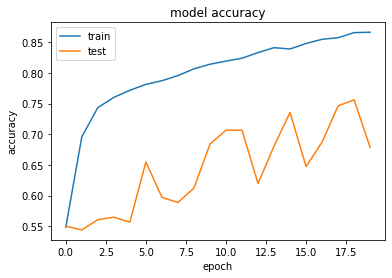

In [26]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

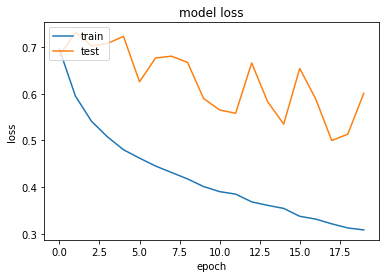

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the Model

In [28]:
vgg_model.save('VGG_s_models/model_1/')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StaticRegexFullMatch in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Select in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StringJoin in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ShardedFilename in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in d

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp 

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in dev

# Re-Training the model with FF++ dataset

In [29]:
#loading the model
re_model = tf.keras.models.load_model('VGG_s_models/model_1/')
re_model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:l

Executing op RestoreV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RestoreV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RestoreV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RestoreV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RestoreV2 in device /job:lo

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableO

dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 15,010,689
Trainable params: 14,898,113
Non-trainable params: 112,576
_________________________________________________________________


In [30]:
re_model.optimizer

In [31]:
re_model.get_weights()

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /j

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [33]:
train_ds_2 = train_dp(dataset_split('ff++'))
val_ds_2 = val_dp(dataset_split('ff++'))

Found 9736 images belonging to 2 classes.
Found 2432 images belonging to 2 classes.


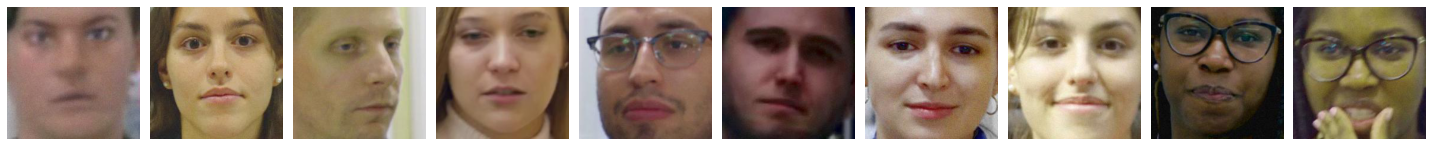

[0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0.]


In [35]:
imgs, labels = next(train_ds_2)
plotImages(imgs)
print(labels)

In [37]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('VGG_s_models/VGG16_2.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

history = re_model.fit(x=train_ds_2, steps_per_epoch=len(train_ds_2),validation_data=val_ds_2, 
                         validation_steps=len(val_ds_2), epochs=20, callbacks=[checkpoint,early])

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

 78/305 [======>.......................] - ETA: 2:17 - loss: 0.5722 - accuracy: 0.7147Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


122/305 [===========>..................] - ETA: 1:42 - loss: 0.5545 - accuracy: 0.7232Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


166/305 [===============>..............] - ETA: 1:12 - loss: 0.5392 - accuracy: 0.7352Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


210/305 [===================>..........] - ETA: 46s - loss: 0.5316 - accuracy: 0.7410Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


298/305 [============================>.] - ETA: 3s - loss: 0.5190 - accuracy: 0.7514Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.5172 - accuracy: 0.7524Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op M

Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


155/305 [==============>...............] - ETA: 38s - loss: 0.4588 - accuracy: 0.7883Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


243/305 [======================>.......] - ETA: 15s - loss: 0.4535 - accuracy: 0.7915Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.7946Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 60/305 [====>.........................] - ETA: 1:02 - loss: 0.4246 - accuracy: 0.8062Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


104/305 [=========>....................] - ETA: 51s - loss: 0.4210 - accuracy: 0.8108Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


192/305 [=================>............] - ETA: 28s - loss: 0.4143 - accuracy: 0.8155Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


280/305 [==========================>...] - ETA: 6s - loss: 0.4078 - accuracy: 0.8158Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.4077 - accuracy: 0.8148Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 97/305 [========>.....................] - ETA: 53s - loss: 0.3902 - accuracy: 0.8241Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


185/305 [=================>............] - ETA: 30s - loss: 0.3876 - accuracy: 0.8236Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


273/305 [=========================>....] - ETA: 8s - loss: 0.3848 - accuracy: 0.8261Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.8278Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 90/305 [=======>......................] - ETA: 54s - loss: 0.3612 - accuracy: 0.8344Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


178/305 [================>.............] - ETA: 32s - loss: 0.3604 - accuracy: 0.8339Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


266/305 [=========================>....] - ETA: 9s - loss: 0.3523 - accuracy: 0.8375 Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.3513 - accuracy: 0.8384Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __

Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 6/20
Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/305 [==>...........................] - ETA: 1:08 - loss: 0.3

 83/305 [=======>......................] - ETA: 56s - loss: 0.3356 - accuracy: 0.8554Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


171/305 [===============>..............] - ETA: 34s - loss: 0.3367 - accuracy: 0.8540Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


259/305 [========================>.....] - ETA: 11s - loss: 0.3306 - accuracy: 0.8571Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.3312 - accuracy: 0.8548Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
305/305 [==============================] - 86s 283ms/step - loss: 0.3312 - accuracy: 0.8548 - val_loss: 0.4133 - val_

 76/305 [======>.......................] - ETA: 58s - loss: 0.3342 - accuracy: 0.8536Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


164/305 [===============>..............] - ETA: 36s - loss: 0.3236 - accuracy: 0.8585Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


252/305 [=======================>......] - ETA: 13s - loss: 0.3139 - accuracy: 0.8649Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.3073 - accuracy: 0.8674Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 69/305 [=====>........................] - ETA: 1:00 - loss: 0.2815 - accuracy: 0.8787Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


157/305 [==============>...............] - ETA: 37s - loss: 0.2976 - accuracy: 0.8740Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


245/305 [=======================>......] - ETA: 15s - loss: 0.2967 - accuracy: 0.8726Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2903 - accuracy: 0.8756Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 62/305 [=====>........................] - ETA: 1:01 - loss: 0.2722 - accuracy: 0.8852Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


150/305 [=============>................] - ETA: 39s - loss: 0.2815 - accuracy: 0.8798Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


238/305 [======================>.......] - ETA: 17s - loss: 0.2800 - accuracy: 0.8828Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2793 - accuracy: 0.8826Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 55/305 [====>.........................] - ETA: 1:04 - loss: 0.2593 - accuracy: 0.8909Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


 99/305 [========>.....................] - ETA: 52s - loss: 0.2710 - accuracy: 0.8842Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


187/305 [=================>............] - ETA: 30s - loss: 0.2701 - accuracy: 0.8827Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


275/305 [==========================>...] - ETA: 7s - loss: 0.2711 - accuracy: 0.8826Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2704 - accuracy: 0.8839Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 48/305 [===>..........................] - ETA: 1:05 - loss: 0.2785 - accuracy: 0.8828Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


 92/305 [========>.....................] - ETA: 54s - loss: 0.2708 - accuracy: 0.8879Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


180/305 [================>.............] - ETA: 31s - loss: 0.2603 - accuracy: 0.8912Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


268/305 [=========================>....] - ETA: 9s - loss: 0.2532 - accuracy: 0.8971Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2522 - accuracy: 0.8975Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 12/20
Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/305 [===>..........................] - ETA: 1:07 - loss: 0.2204 - accuracy: 0.9192Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


 85/305 [=======>......................] - ETA: 56s - loss: 0.2284 - accuracy: 0.9154Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


173/305 [================>.............] - ETA: 33s - loss: 0.2349 - accuracy: 0.9091Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


261/305 [========================>.....] - ETA: 11s - loss: 0.2420 - accuracy: 0.9045Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.9032Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executi

Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
305/305 [==============================] - 86s 283ms/step - loss: 0.2416 - accuracy: 0.9032 - val_loss: 0.3765 - val_accuracy: 0.8174
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localh

 78/305 [======>.......................] - ETA: 58s - loss: 0.2414 - accuracy: 0.8954Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


166/305 [===============>..............] - ETA: 35s - loss: 0.2393 - accuracy: 0.8988Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


254/305 [=======================>......] - ETA: 13s - loss: 0.2358 - accuracy: 0.9021Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2349 - accuracy: 0.9039Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 71/305 [=====>........................] - ETA: 1:00 - loss: 0.2213 - accuracy: 0.9080Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


159/305 [==============>...............] - ETA: 37s - loss: 0.2366 - accuracy: 0.9054Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


247/305 [=======================>......] - ETA: 14s - loss: 0.2324 - accuracy: 0.9055Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2273 - accuracy: 0.9076Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 64/305 [=====>........................] - ETA: 1:01 - loss: 0.2287 - accuracy: 0.9106Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


152/305 [=============>................] - ETA: 39s - loss: 0.2159 - accuracy: 0.9139Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


240/305 [======================>.......] - ETA: 16s - loss: 0.2218 - accuracy: 0.9111Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2191 - accuracy: 0.9128Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 57/305 [====>.........................] - ETA: 1:03 - loss: 0.2152 - accuracy: 0.9139Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


101/305 [========>.....................] - ETA: 52s - loss: 0.2208 - accuracy: 0.9068Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


189/305 [=================>............] - ETA: 29s - loss: 0.2167 - accuracy: 0.9100Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


277/305 [==========================>...] - ETA: 7s - loss: 0.2062 - accuracy: 0.9145Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2067 - accuracy: 0.9137Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


 94/305 [========>.....................] - ETA: 54s - loss: 0.2082 - accuracy: 0.9209Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


182/305 [================>.............] - ETA: 31s - loss: 0.2034 - accuracy: 0.9212Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


270/305 [=========================>....] - ETA: 8s - loss: 0.2012 - accuracy: 0.9217Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.2018 - accuracy: 0.9218Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


Epoch 18/20
Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0
 87/305 [=======>......................] - ETA: 55s - loss: 0.1933 - accuracy: 0.9246Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


175/305 [================>.............] - ETA: 33s - loss: 0.1909 - accuracy: 0.9256Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


263/305 [========================>.....] - ETA: 10s - loss: 0.1868 - accuracy: 0.9255Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.1899 - accuracy: 0.9234Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __infer

305/305 [==============================] - 86s 283ms/step - loss: 0.1899 - accuracy: 0.9234 - val_loss: 0.5920 - val_accuracy: 0.7784
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device

168/305 [===============>..............] - ETA: 35s - loss: 0.1881 - accuracy: 0.9247Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


256/305 [========================>.....] - ETA: 12s - loss: 0.1931 - accuracy: 0.9218Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.1877 - accuracy: 0.9251Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


161/305 [==============>...............] - ETA: 36s - loss: 0.1849 - accuracy: 0.9303Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


249/305 [=======================>......] - ETA: 14s - loss: 0.1813 - accuracy: 0.9303Executing op __inference_train_function_38614 in device /job:localhost/replica:0/task:0/device:GPU:0


305/305 [==============================] - ETA: 0s - loss: 0.1825 - accuracy: 0.9305Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_39555 in device /job:localhost/replica:0/task:0/device:GPU:0


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


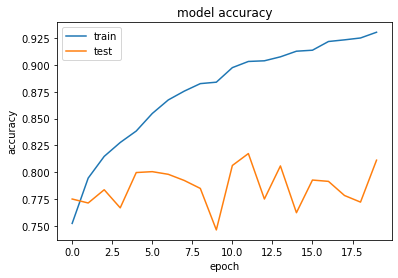

In [38]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


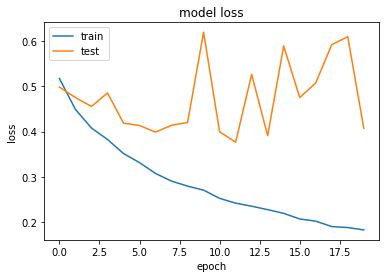

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the new_model

In [40]:
re_model.save('VGG_s_models/model_2/')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StaticRegexFullMatch in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Select in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StringJoin in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShardedFilename in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitialized

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in dev

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitialize